# Problem:

Predict whether a customer will default or not based on the information about customer and the loan

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import metrics



In [2]:
credit_df = pd.read_csv("credit.csv")
credit_df.head(10)  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [4]:
# Check null values
credit_df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [5]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
credit_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
credit_df.shape

(1000, 17)

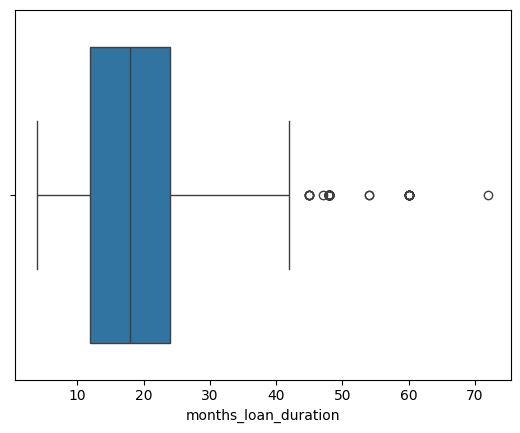

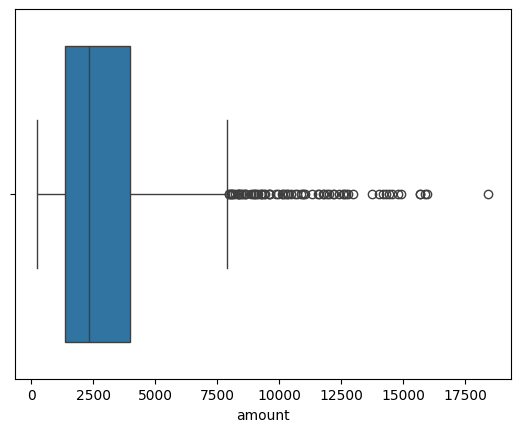

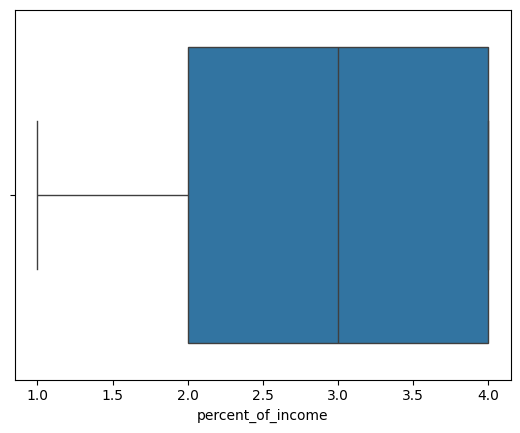

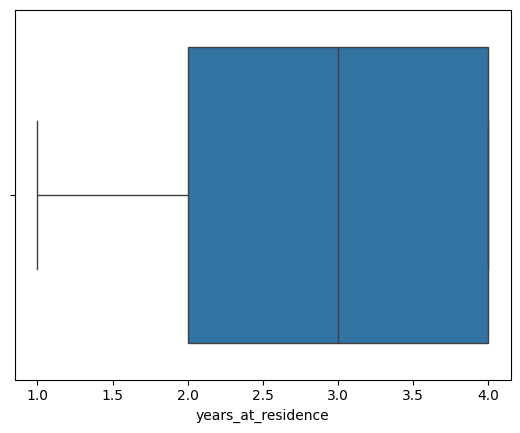

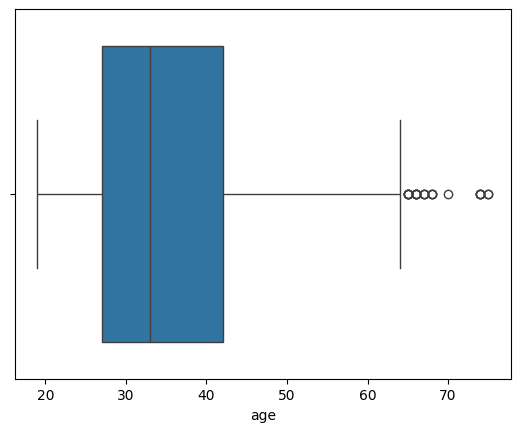

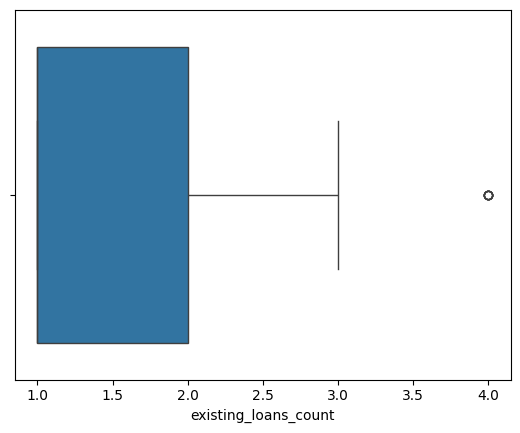

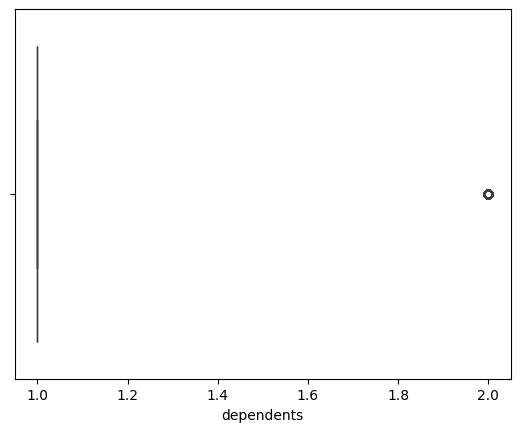

In [8]:
df_num = credit_df.select_dtypes(include = [np.number])
for feature in df_num.columns:
    sns.boxplot(x=df_num[feature])
    plt.show()
    

In [9]:

### DISCUSS - DO NOT BLINDLY DROP OUTLIERS! WHY????
### Decision is to remove outliers only from 'months_loan_duration' and 'amount' columns


### However, since dataset is small the outliers are not removed in this example



Q1 = credit_df['months_loan_duration'].quantile(0.25)
Q3 = credit_df['months_loan_duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-IQR
upper = Q3+IQR

credit_df = credit_df[~((credit_df['months_loan_duration'] < lower) | (credit_df['months_loan_duration'] > upper))]

#reset the row index
credit_df = credit_df.reset_index(drop=True)

#check the shape of the data
credit_df.shape

Q1 = credit_df['amount'].quantile(0.25)
Q3 = credit_df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-IQR
upper = Q3+IQR

credit_df = credit_df[~((credit_df['amount'] < lower) | (credit_df['amount'] > upper))]

#reset the row index
credit_df = credit_df.reset_index(drop=True)

#check the shape of the data
credit_df.shape

In [10]:
#for feature in df_num.columns:
#    sns.boxplot(x=credit_df['default'],y=df_num[feature])
#    plt.show()

In [11]:
# value counts for categorical columns

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with 
        print('\n',credit_df[feature].value_counts())


 checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

 credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

 purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

 savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64

 employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64

 other_credit
none     814
bank     139
store     47
Name: count, dtype: int64

 housing
own      713
rent     179
other    108
Name: count, dtype: int64

 job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64


In [12]:
# Fix the typo error 'car0'
credit_df['purpose'].replace('car0','car',inplace=True)
credit_df['purpose'].value_counts()

purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64

### Encode target variable 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
credit_df['default'] = le.fit_transform(credit_df['default'])
credit_df['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

### Features using Dummy variables and Ordinal encoder as appropriate

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [16]:
credit_df['checking_balance'].value_counts()

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

In [17]:

#### NOTE: For Ordinal as well as nominal variables, "Label Encoder" is acceptable for Decision Tree. 
####       In this example, ordinal encoder is used for Ordinal variables


oe_order = OrdinalEncoder(categories=[['unknown','< 0 DM','1 - 200 DM','> 200 DM'],
                                      ['critical','poor','good','very good','perfect'],
                                      ['unknown','< 100 DM','100 - 500 DM','500 - 1000 DM','> 1000 DM'],
                                      ['unemployed','< 1 year','1 - 4 years','4 - 7 years','> 7 years'],
                                      ['no','yes']], dtype=np.int32)
credit_df[['checking_balance','credit_history','savings_balance','employment_duration','phone']] = \
    oe_order.fit_transform(credit_df[['checking_balance','credit_history','savings_balance','employment_duration','phone']])

In [18]:
credit_df['checking_balance'].value_counts()

checking_balance
0    394
1    274
2    269
3     63
Name: count, dtype: int64

In [19]:
#credit_df['credit_history'].value_counts()

In [20]:
#credit_df['savings_balance'].value_counts()

In [21]:
#credit_df['employment_duration'].value_counts()

In [22]:
#credit_df['phone'].value_counts()

In [23]:
credit_df.dtypes

checking_balance         int32
months_loan_duration     int64
credit_history           int32
purpose                 object
amount                   int64
savings_balance          int32
employment_duration      int32
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                    int32
default                  int64
dtype: object

In [24]:
for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with 
        print('\n',credit_df[feature].value_counts())


 purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64

 other_credit
none     814
bank     139
store     47
Name: count, dtype: int64

 housing
own      713
rent     179
other    108
Name: count, dtype: int64

 job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64


In [25]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,furniture/appliances,1169,0,4,4,4,67,none,own,2,skilled,1,1,0
1,2,48,2,furniture/appliances,5951,1,2,2,2,22,none,own,1,skilled,1,0,1
2,0,12,0,education,2096,1,3,2,3,49,none,own,1,unskilled,2,0,0
3,1,42,2,furniture/appliances,7882,1,3,2,4,45,none,other,1,skilled,2,0,0
4,1,24,1,car,4870,1,2,3,4,53,none,other,2,skilled,2,0,1


In [26]:
# Define Dummy variable

#credit_df = pd.get_dummies(credit_df, drop_first=True, dtype=np.uint8)



In [27]:
# NOTE: Label encoder is used in this example for nominal variables. This will NOT be okay if other algorithms like
#       Logistic Regrssion is to be used 

le = LabelEncoder()
for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with 
        credit_df[feature] = le.fit_transform(credit_df[feature])

In [28]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,3,1169,0,4,4,4,67,1,1,2,1,1,1,0
1,2,48,2,3,5951,1,2,2,2,22,1,1,1,1,1,0,1
2,0,12,0,2,2096,1,3,2,3,49,1,1,1,3,2,0,0
3,1,42,2,3,7882,1,3,2,4,45,1,0,1,1,2,0,0
4,1,24,1,1,4870,1,2,3,4,53,1,0,2,1,2,0,1


In [29]:
credit_df.dtypes

checking_balance        int32
months_loan_duration    int64
credit_history          int32
purpose                 int64
amount                  int64
savings_balance         int32
employment_duration     int32
percent_of_income       int64
years_at_residence      int64
age                     int64
other_credit            int64
housing                 int64
existing_loans_count    int64
job                     int64
dependents              int64
phone                   int32
default                 int64
dtype: object

In [30]:
# create new feature
# credit_df['months_inter_amount'] = credit_df['months_loan_duration'] * credit_df['amount'] 

In [31]:
credit_df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,3,1169,0,4,4,4,67,1,1,2,1,1,1,0
1,2,48,2,3,5951,1,2,2,2,22,1,1,1,1,1,0,1
2,0,12,0,2,2096,1,3,2,3,49,1,1,1,3,2,0,0
3,1,42,2,3,7882,1,3,2,4,45,1,0,1,1,2,0,0
4,1,24,1,1,4870,1,2,3,4,53,1,0,2,1,2,0,1
5,0,36,2,2,9055,0,2,2,4,35,1,0,1,3,2,1,0
6,0,24,2,3,2835,3,4,3,4,53,1,1,1,1,1,0,0
7,2,36,2,1,6948,1,2,2,2,35,1,2,1,0,1,1,0
8,0,12,2,3,3059,4,3,2,4,61,1,1,1,3,1,0,0
9,2,30,0,1,5234,1,0,4,2,28,1,1,2,0,1,0,1


In [32]:


## Perform more detailed EDA (not done in this example)



# chi Square Test

In [33]:
from scipy.stats import chi2_contingency


In [ ]:
Null Hypothesis (H₀):
There is no significant relationship between the categorical independent variables and the dependent variable.

Alternative Hypothesis (H₁):
There is a significant relationship between at least one of the categorical independent variables  and 
the dependent variable .

In [34]:
# Assuming you have a DataFrame 'data' with columns X and y
# Extract X and y from the DataFrame
X = credit_df[['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
          'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
          'years_at_residence', 'age', 'other_credit', 'housing',
          'existing_loans_count', 'job', 'dependents', 'phone']]
y = credit_df['default']


In [35]:
# Create a contingency table between each categorical variable in X and y
chi2_results = {}
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': p_val}

# Display chi-square test results for each variable
results_df = pd.DataFrame(chi2_results).T
print(results_df)


                            chi2       p-value
checking_balance      123.720944  1.218902e-26
months_loan_duration   78.886937  7.784572e-06
credit_history         61.691397  1.279187e-12
purpose                 7.637347  1.058032e-01
amount                931.746032  3.865968e-01
savings_balance        36.098928  2.761214e-07
employment_duration    18.368274  1.045452e-03
percent_of_income       5.476792  1.400333e-01
years_at_residence      0.749296  8.615521e-01
age                    57.477396  2.795421e-01
other_credit           12.839188  1.629318e-03
housing                18.199842  1.116747e-04
existing_loans_count    2.671198  4.451441e-01
job                     1.885156  5.965816e-01
dependents              0.000000  1.000000e+00
phone                   1.172559  2.788762e-01


In [ ]:
inference :
    The p-value is less than the chosen significance level (α = 0.05)
    Hence,reject the null hypothesis 
    There is a significant relationship between the independent variables and the loan default status.

## Define features and target. Perform Train-Test split 

In [36]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [37]:
# Putting feature variable to X
X = credit_df.drop('default',axis=1)

# Putting response variable to y
y = credit_df['default']

In [38]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify=credit_df['default'])
#X_train.head()

## Create function to capture model performance

In [39]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Alogithm', 'Accuracy Score', 'AUC Score', 'f1-score', 'Precision Score', 'Recall Score'])

def update_score_card(algorithm_name, y_pred, y_pred_proba):
    
    # let 'y_pred_prob' be the predicted values of y
    #global score_card

    new_row = [algorithm_name,
               metrics.accuracy_score(y_test, y_pred),
               metrics.roc_auc_score(y_test, y_pred_proba),  
               metrics.f1_score(y_test, y_pred),
               metrics.precision_score(y_test, y_pred),
               metrics.recall_score(y_test, y_pred),
               ] 
    
    score_card.loc[len(score_card)] = new_row
    


## Decision Tree

In [40]:
# invoking the decision tree classifier function. 
#Restricting the depth of the tree to 10 (no particular reason for selecting this                                 
dt_model = DecisionTreeClassifier(random_state = 10 )

In [41]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [42]:
# Making predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:,1]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix and accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.705
[[115  25]
 [ 34  26]]


In [44]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       140
           1       0.51      0.43      0.47        60

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.69      0.70      0.70       200



In [45]:
# Check training and testing score
# Training Score
print('Training score')
print(dt_model.score(X_train,y_train))
print('Test score')
print(dt_model.score(X_test , y_test))

Training score
1.0
Test score
0.705


In [46]:

# Features importance in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature)

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.121171
months_loan_duration  0.126304
credit_history        0.057282
purpose               0.071270
amount                0.170685
savings_balance       0.039583
employment_duration   0.070842
percent_of_income     0.022875
years_at_residence    0.047682
age                   0.138444
other_credit          0.028717
housing               0.012871
existing_loans_count  0.038277
job                   0.028766
dependents            0.014716
phone                 0.010516


In [47]:
class_label = ['No', 'Yes']

In [48]:


## Because the tree is large, this code will take some time to execute 
## and even after that the tree will be un-readable. Hence commented out the code


#from sklearn.tree import plot_tree
#plt.figure(figsize=(70,35))
#a=plot_tree(dt_model,feature_names=list(X_train.columns), class_names = list(class_label))

In [49]:
# Other option to visualize tree - view image on Graphviz website 

In [50]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('credit_tree_1.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(class_label))
#dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train))
Credit_Tree_File.close()




http://webgraphviz.com/

### **** EXTRA CODE
### **** The below code is NOT needed. 
##### *** We can start with grid search of multiple parameters. But this code added is for understanding overfit


In [51]:
#With Hyper Parameters Tuning
from sklearn.model_selection import GridSearchCV

model= DecisionTreeClassifier(random_state=10, max_depth=15)

# specify number of folds for k-fold CV
n_folds = 5

# hyper parameters to build the model on
params = {'max_depth': range(2, 20)}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, cv=n_folds, return_train_score=True)
#Learning
model1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=10),
             param_grid={'max_depth': range(2, 20)}, return_train_score=True)

In [52]:
scores = model1.cv_results_


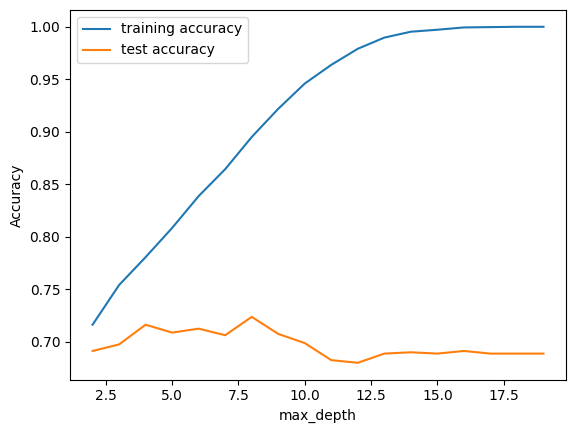

In [53]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'max_depth': 8}



### **** END EXTRA CODE


### Tune multiple papameters

In [55]:
# Tune multiple parameters with Hyper Parameters Tuning

#making the instance
model= DecisionTreeClassifier(random_state=0)

# hyper parameters to build the model on
params = {'criterion':('gini','entropy'), 
          'max_depth': range(3, 10),
         'min_samples_split': range(2, 8)}

#Making models with hyper parameters sets
grid_model = GridSearchCV(model, cv=5, param_grid=params)
#Learning
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(3, 10),
                         'min_samples_split': range(2, 8)})

In [56]:
print("Best Hyper Parameters:",grid_model.best_params_)

Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4}


In [57]:
dt_model = DecisionTreeClassifier(criterion = grid_model.best_params_.get('criterion'), 
                                  max_depth = grid_model.best_params_.get('max_depth'),
                                  min_samples_split = grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=4,
                       random_state=10)

In [58]:
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[125,  15],
       [ 37,  23]])

In [59]:
update_score_card("Decision Tree", y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.74,0.747024,0.469388,0.605263,0.383333


# Ensemble Techniques 
## Bagging Classifier   (Extra)

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
# Create instance of Bagging Classifier
gauss_nb_model = GaussianNB()
bgcl = BaggingClassifier(estimator=gauss_nb_model, random_state=10)

# hyper parameters to build the model on
params = {'n_estimators':range(30,60,5)}

#Making models with hyper parameters sets
grid_model = GridSearchCV(bgcl, cv=5, param_grid=params)


grid_model.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print('Best param',grid_model.best_params_)

Best param {'n_estimators': 45}


In [62]:
bgcl = BaggingClassifier(estimator=gauss_nb_model, n_estimators=grid_model.best_params_.get('n_estimators'), random_state=0)

bgcl = bgcl.fit(X_train, y_train)


In [63]:
y_pred = bgcl.predict(X_test)
y_pred_proba = bgcl.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[122,  18],
       [ 36,  24]])

In [64]:
update_score_card('Bagging with GaussianNB', y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.74,0.747024,0.469388,0.605263,0.383333
1,Bagging with GaussianNB,0.73,0.718929,0.470588,0.571429,0.400000


## RandomForest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': range(60,160,10) ,
    'max_depth': [10, 14, 18],
    'min_samples_split': [6, 8, 10]
    
}
# Create a based model
rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_model = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, 
                           n_jobs = -1)

In [67]:
# Fit the grid search to the data
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 14, 18],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': range(60, 160, 10)})

In [68]:
# printing the optimal accuracy score and hyperparameters
print('Best param',grid_model.best_params_)

Best param {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 70}


In [69]:
rf_model = RandomForestClassifier(n_estimators = grid_model.best_params_.get('n_estimators'), 
                                  max_depth = grid_model.best_params_.get('max_depth'),
                                  min_samples_split = grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=70,
                       random_state=10)

In [70]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[129,  11],
       [ 34,  26]])

In [71]:
update_score_card("Random Forest", y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.740,0.747024,0.469388,0.605263,0.383333
1,Bagging with GaussianNB,0.730,0.718929,0.470588,0.571429,0.400000
2,Random Forest,0.775,0.800714,0.536082,0.702703,0.433333


## AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:

param_grid = {
    'n_estimators': range(40,70,5) ,
    'learning_rate': [0.1, 0.3, 0.5, 0.7] 
    
}
# Create a based model
ada = AdaBoostClassifier(random_state=0)
# Instantiate the grid search model
grid_model = GridSearchCV(estimator = ada, param_grid = param_grid, cv=5, 
                           n_jobs = -1)

In [74]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'n_estimators': range(40, 70, 5)})

In [75]:
print('Best param',grid_model.best_params_)

Best param {'learning_rate': 0.5, 'n_estimators': 60}


In [76]:
adaModel = AdaBoostClassifier(n_estimators = grid_model.best_params_.get('n_estimators'), 
                                  learning_rate= grid_model.best_params_.get('learning_rate'),
                                  random_state = 10)
adaModel.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.5, n_estimators=60, random_state=10)

In [77]:
y_pred = adaModel.predict(X_test)
y_pred_proba = adaModel.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)


array([[120,  20],
       [ 35,  25]])

In [78]:
update_score_card("AdaBoost", y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.740,0.747024,0.469388,0.605263,0.383333
1,Bagging with GaussianNB,0.730,0.718929,0.470588,0.571429,0.400000
2,Random Forest,0.775,0.800714,0.536082,0.702703,0.433333
3,AdaBoost,0.725,0.758810,0.476190,0.555556,0.416667


## Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:

param_grid = {
    'n_estimators': range(10,50,5) ,
    'learning_rate': [0.05, 0.1, 0.2, 0.3,0.4 ] ,
    'max_depth': [3,5,7]
}
# Create a based model
gbm = GradientBoostingClassifier(random_state=0)
# Instantiate the grid search model
grid_model = GridSearchCV(estimator = gbm, param_grid = param_grid, cv=5,return_train_score=True ,
                           n_jobs = -1)

In [81]:
%%time
grid_model.fit(X_train, y_train)

CPU times: user 1.39 s, sys: 131 ms, total: 1.53 s
Wall time: 45.9 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 7],
                         'n_estimators': range(10, 50, 5)},
             return_train_score=True)

In [82]:
print('Best param',grid_model.best_params_)

Best param {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 35}


In [83]:
gb_model = GradientBoostingClassifier(n_estimators = grid_model.best_params_.get('n_estimators'), 
                                      max_depth = grid_model.best_params_.get('max_depth'),
                                      learning_rate=grid_model.best_params_.get('learning_rate'),
                                      random_state = 10)
gb_model.fit(X_train, y_train);

In [84]:
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[128,  12],
       [ 31,  29]])

In [85]:
update_score_card("Gradient Boost", y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.740,0.747024,0.469388,0.605263,0.383333
1,Bagging with GaussianNB,0.730,0.718929,0.470588,0.571429,0.400000
2,Random Forest,0.775,0.800714,0.536082,0.702703,0.433333
3,AdaBoost,0.725,0.758810,0.476190,0.555556,0.416667
4,Gradient Boost,0.785,0.784524,0.574257,0.707317,0.483333


## XGBoost

In [86]:
from xgboost import XGBClassifier

In [87]:
param_grid = {
    'n_estimators': range(30,60,5) ,
    'learning_rate': [0.05, 0.1, 0.3, 0.5] ,
    'reg_lambda': [0,1,2,3],
    'gamma':[0.5,1,2]
#    'min_child_weight':[0,1,2]
   }
# Create a based model
xgb = XGBClassifier(random_state=10)
# Instantiate the grid search model
grid_model = GridSearchCV(estimator = xgb, param_grid = param_grid, cv=3,return_train_score=True ,
                           n_jobs = -1)

In [88]:
%%time
grid_model.fit(X_train, y_train)

CPU times: user 3.54 s, sys: 382 ms, total: 3.92 s
Wall time: 44.8 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 2],
                         'learning_rate': [0.05, 0.1, 0.3, 0.5],
                         'n_estimators': range(30, 60, 5),
                         'reg_lambda': [0, 1, 2, 3]},
             return_train_score=True)

In [89]:
print('Best param',grid_model.best_params_)

Best param {'gamma': 0.5, 'learning_rate': 0.5, 'n_estimators': 35, 'reg_lambda': 2}


In [90]:
xgb_model = XGBClassifier(n_estimators = grid_model.best_params_.get('n_estimators'), 
                                  learning_rate = grid_model.best_params_.get('learning_rate'),
                                  reg_lambda = grid_model.best_params_.get('lambda'),
                                  gamma = grid_model.best_params_.get('gamma'),
                                  min_child_weight = grid_model.best_params_.get('min_child_weight'),
                                  random_state = 10)
xgb_model.fit(X_train, y_train);

In [91]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train);

In [92]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[125,  15],
       [ 31,  29]])

In [93]:
update_score_card("XG Boost", y_pred, y_pred_proba)
score_card

,Alogithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Decision Tree,0.740,0.747024,0.469388,0.605263,0.383333
1,Bagging with GaussianNB,0.730,0.718929,0.470588,0.571429,0.400000
2,Random Forest,0.775,0.800714,0.536082,0.702703,0.433333
3,AdaBoost,0.725,0.758810,0.476190,0.555556,0.416667
4,Gradient Boost,0.785,0.784524,0.574257,0.707317,0.483333
5,XG Boost,0.770,0.771190,0.557692,0.659091,0.483333


Inference : 

Our study underscores the critical role of data analysis in the financial sector, particularly for loan default prediction.Machine learning algorithm evaluations demonstrate varying accuracies, with Gradient Boost identified as the most effective predictor of loan defaults.This insight emphasizes the practical value of data analytics in refining credit risk assessment and improving decision-making within lending institutions.Adopting robust predictive models like Gradient Boost can empower financial entities to make well-informed lending decisions, leading to enhanced loan portfolio management and more effective risk mitigation strategies.